            # PREDICTING HEART DISEASE BASED ON MEDICAL REPORTS BY APPLICATION OF DECISION TREES

IMPORTING RELEVENT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

CALLING THE DATABASE


In [2]:
df=pd.read_csv('/Users/riteshkumar/Downloads/processed.cleveland.data',header=None)

In [4]:
df.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [453]:
df.columns=['age','sex','chestpain','restbp','chol','fastbloodsugar',
            'restecg','thalach','ExAngina','oldpeak','slope','ca','thal','heartDisease']

In [454]:
df.head()

,age,sex,chestpain,restbp,chol,fastbloodsugar,restecg,thalach,ExAngina,oldpeak,slope,ca,thal,heartDisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [455]:
df.isna().sum()

age               0
sex               0
chestpain         0
restbp            0
chol              0
fastbloodsugar    0
restecg           0
thalach           0
ExAngina          0
oldpeak           0
slope             0
ca                0
thal              0
heartDisease      0
dtype: int64

In [456]:
df.dtypes

age               float64
sex               float64
chestpain         float64
restbp            float64
chol              float64
fastbloodsugar    float64
restecg           float64
thalach           float64
ExAngina          float64
oldpeak           float64
slope             float64
ca                 object
thal               object
heartDisease        int64
dtype: object

EXPLORATORY DATA ANALYSIS AND SOLVING NaN VALUE ISSUES

In [457]:
df.ca.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [458]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [459]:
len(df.loc[df.ca=='?'])

4

In [460]:
len(df.loc[df.thal=='?'])

2

In [461]:
df.shape

(303, 14)

In [462]:
df.corr()

,age,sex,chestpain,restbp,chol,fastbloodsugar,restecg,thalach,ExAngina,oldpeak,slope,heartDisease
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.224469
chestpain,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.407075
restbp,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.070909
fastbloodsugar,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.415040
ExAngina,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.504092


In [463]:
df=df.loc[df.ca!='?']

In [464]:
df.shape

(299, 14)

In [465]:
df=df.loc[df.thal!='?']

In [466]:
df.head()

,age,sex,chestpain,restbp,chol,fastbloodsugar,restecg,thalach,ExAngina,oldpeak,slope,ca,thal,heartDisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [467]:
df.shape

(297, 14)

In [468]:
df.corr()

,age,sex,chestpain,restbp,chol,fastbloodsugar,restecg,thalach,ExAngina,oldpeak,slope,heartDisease
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.226797
chestpain,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.404248
restbp,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.066448
fastbloodsugar,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.420639
ExAngina,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.501461


In [469]:
X=df.drop(['heartDisease'],axis=1)
y=df.heartDisease

In [470]:
df.head()

,age,sex,chestpain,restbp,chol,fastbloodsugar,restecg,thalach,ExAngina,oldpeak,slope,ca,thal,heartDisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [471]:
X.dtypes

age               float64
sex               float64
chestpain         float64
restbp            float64
chol              float64
fastbloodsugar    float64
restecg           float64
thalach           float64
ExAngina          float64
oldpeak           float64
slope             float64
ca                 object
thal               object
dtype: object

DUMMY ENCODING FOR PROPER DATA REPRESENTATION AND EVALUATION

In [472]:
X=pd.get_dummies(X,columns=['chestpain','restecg','slope','thal'])
X.head()

,age,sex,restbp,chol,fastbloodsugar,thalach,ExAngina,oldpeak,ca,chestpain_1.0,...,chestpain_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [473]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# X['chestpain']=le.fit_transform(df['chestpain'])

In [474]:
# X['restecg']=le.fit_transform(df['restecg'])

In [475]:
# X['slope']=le.fit_transform(df['slope'])

In [476]:
# X['thal']=le.fit_transform(df['thal'])

In [477]:
X.head()

,age,sex,restbp,chol,fastbloodsugar,thalach,ExAngina,oldpeak,ca,chestpain_1.0,...,chestpain_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [478]:
X.dtypes

age               float64
sex               float64
restbp            float64
chol              float64
fastbloodsugar    float64
thalach           float64
ExAngina          float64
oldpeak           float64
ca                 object
chestpain_1.0       uint8
chestpain_2.0       uint8
chestpain_3.0       uint8
chestpain_4.0       uint8
restecg_0.0         uint8
restecg_1.0         uint8
restecg_2.0         uint8
slope_1.0           uint8
slope_2.0           uint8
slope_3.0           uint8
thal_3.0            uint8
thal_6.0            uint8
thal_7.0            uint8
dtype: object

In [479]:
X.fastbloodsugar.unique()

array([1., 0.])

In [480]:
# X['sex'] = df['sex'].astype(np.int64)

In [481]:
X.head()

,age,sex,restbp,chol,fastbloodsugar,thalach,ExAngina,oldpeak,ca,chestpain_1.0,...,chestpain_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [482]:
# X['fastbloodsugar'] = df['fastbloodsugar'].astype(np.int64)

In [483]:
X.head()

,age,sex,restbp,chol,fastbloodsugar,thalach,ExAngina,oldpeak,ca,chestpain_1.0,...,chestpain_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [484]:
y.unique()

array([0, 2, 1, 3, 4])

In [485]:
y[y>0]=1

In [486]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: heartDisease, dtype: int64

In [487]:
df.head()

,age,sex,chestpain,restbp,chol,fastbloodsugar,restecg,thalach,ExAngina,oldpeak,slope,ca,thal,heartDisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


IMPLEMENTING DECISION TREE CLASSIFIER AND DIVIDING THE DATABASE IN TRAIN AND TEST SETS 

In [488]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
clas_dt=DecisionTreeClassifier(random_state=42)

In [489]:
clas_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

PLOTTING THE DECISION TREE AFTER THE IMPLEMENTATION

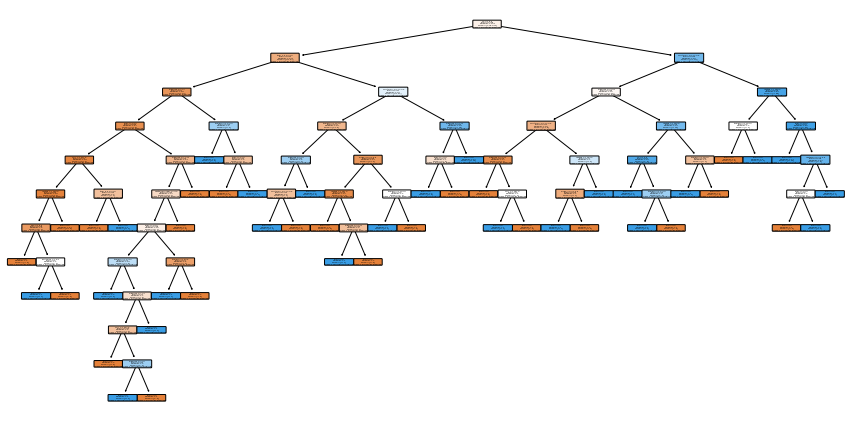

In [490]:
plt.figure(figsize=(15,7.5))
plot_tree(clas_dt,filled=True,rounded=True,class_names=['NO HEART DISEASE','YES HEART DISEASE'],
         feature_names=X.columns);

TRUTH TABLE FOR EVALUATION OF MODEL

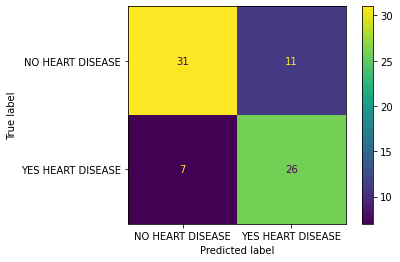

In [491]:
plot_confusion_matrix(clas_dt,X_test,y_test,display_labels=['NO HEART DISEASE','YES HEART DISEASE'])

In [492]:
path=clas_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]

In [493]:
clas_dts =[]
for i in ccp_alphas:
    clas_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    clas_dt.fit(X_train,y_train)
    clas_dts.append(clas_dt)

In [495]:
train_score=[clas_dt.score(X_train,y_train) for clas_dt in clas_dts]
test_score=[clas_dt.score(X_test,y_test) for clas_dt in clas_dts]

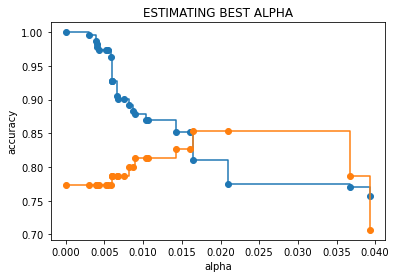

In [499]:
fig, ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('ESTIMATING BEST ALPHA')
ax.plot(ccp_alphas, train_score, marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas, test_score, marker='o',label='train',drawstyle='steps-post')

In [510]:
clas_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)
clas_dt=clas_dt.fit(X_train,y_train)

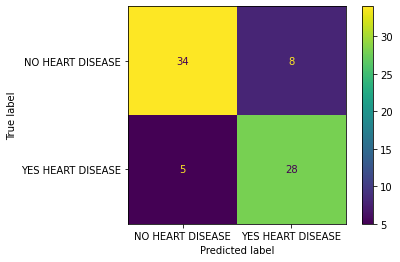

In [511]:
plot_confusion_matrix(clas_dt,X_test,y_test,display_labels=['NO HEART DISEASE','YES HEART DISEASE'])

<AxesSubplot:xlabel='tree'>

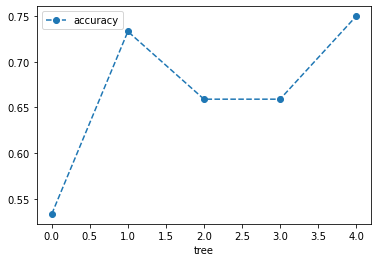

In [509]:
# cross_val=cross_val_score(clas_dt,X_train,y_train,cv=5)
# df=pd.DataFrame(data={'tree': range(5),'accuracy' : cross_val})
# df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

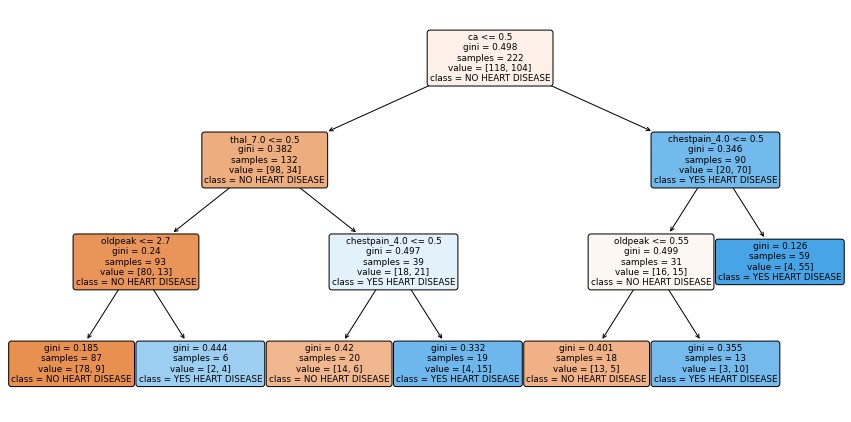

In [512]:
plt.figure(figsize=(15,7.5))
plot_tree(clas_dt,filled=True,rounded=True,class_names=['NO HEART DISEASE','YES HEART DISEASE'],
         feature_names=X.columns);